In [1]:
pwd


'/Users/surajpawar/Desktop/uber trips analysis using python'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/Users/surajpawar/Desktop/uber trips analysis using python/uber-raw-data-sep14.csv")
data.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [5]:
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime)
data.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


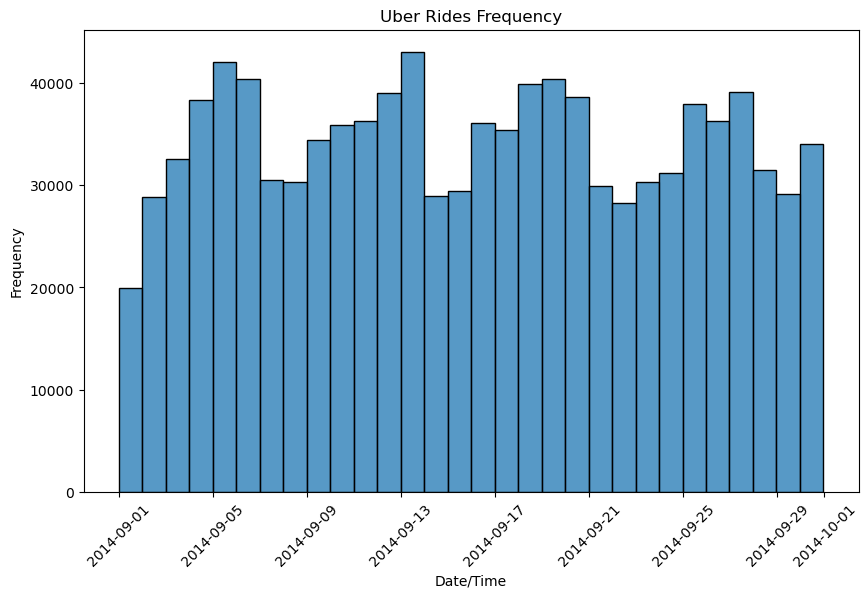

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Date/Time", bins=30)
plt.xlabel("Date/Time")
plt.ylabel("Frequency")
plt.title("Uber Rides Frequency")
plt.xticks(rotation=45)
plt.show()

In [7]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [8]:
data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)
data.head()

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


/var/folders/q_/qrb1fwh54qj3dkdx5bd073540000gn/T/ipykernel_25062/1438482754.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Day"])


<Axes: xlabel='Day', ylabel='Density'>

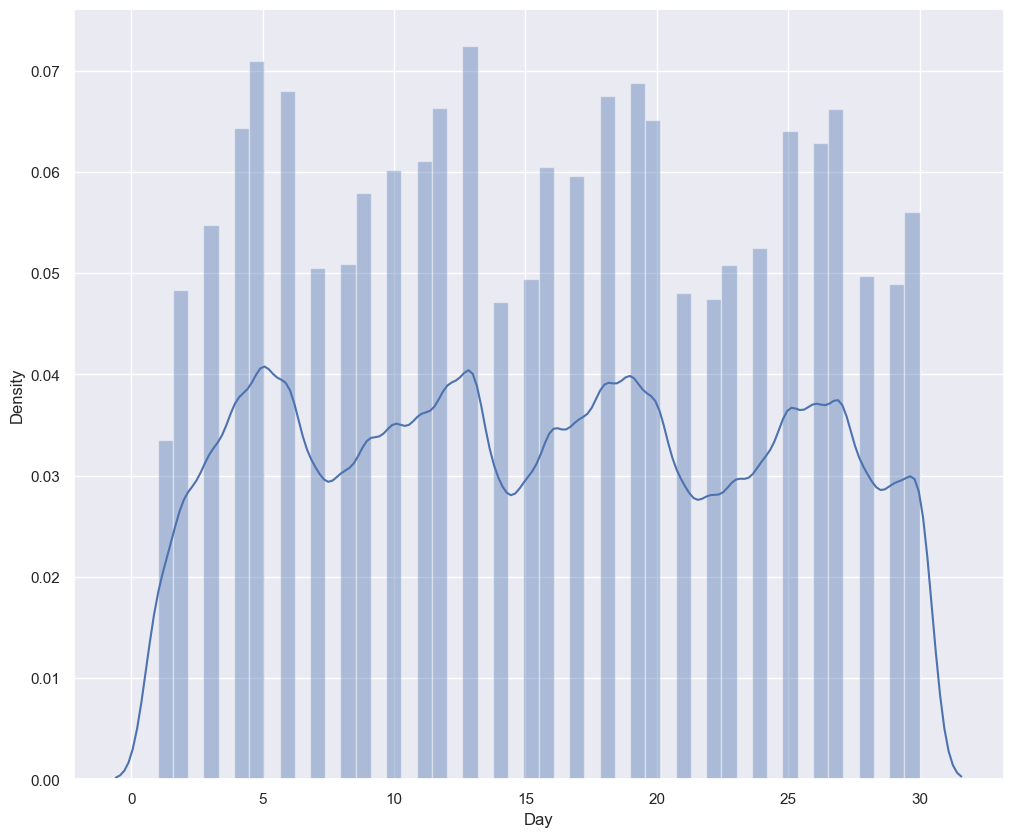

In [9]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(data["Day"])

/var/folders/q_/qrb1fwh54qj3dkdx5bd073540000gn/T/ipykernel_25062/96630979.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Hour"])


<Axes: xlabel='Hour', ylabel='Density'>

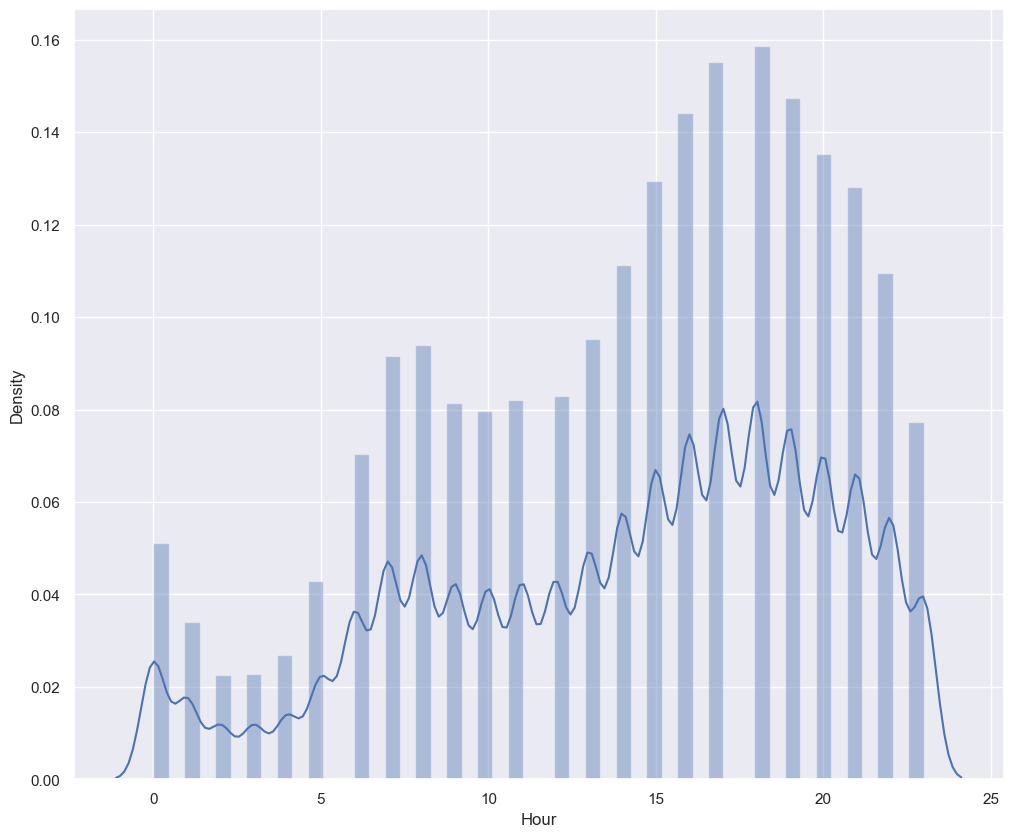

In [10]:
sns.distplot(data["Hour"])

/var/folders/q_/qrb1fwh54qj3dkdx5bd073540000gn/T/ipykernel_25062/2809950383.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Weekday"])


<Axes: xlabel='Weekday', ylabel='Density'>

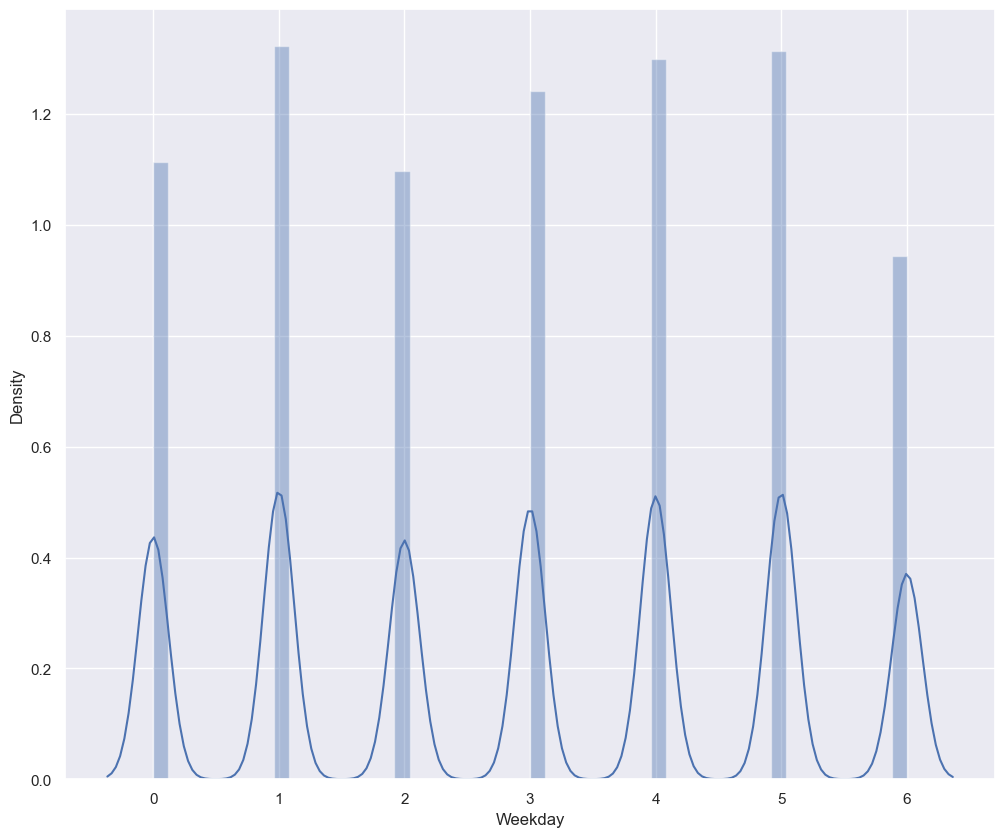

In [11]:
sns.distplot(data["Weekday"])

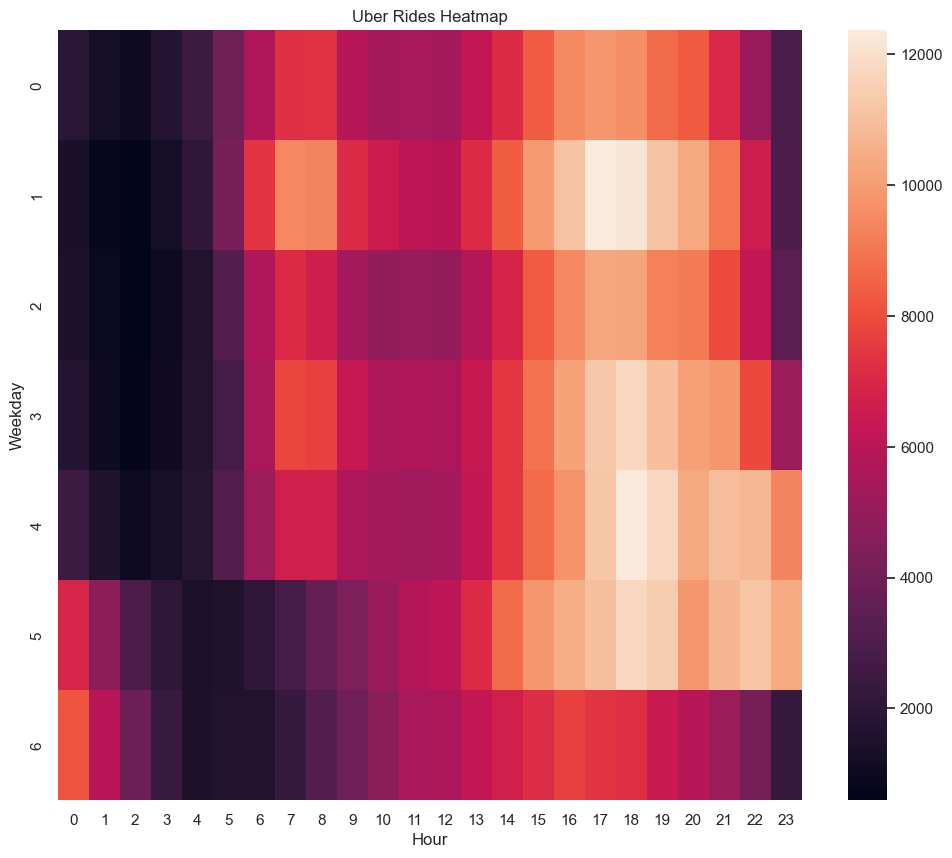

In [15]:
df = data.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot = False)
plt.xlabel("Hour")
plt.ylabel("Weekday")
plt.title("Uber Rides Heatmap")

plt.show()

/Users/surajpawar/Desktop/anaconda3/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


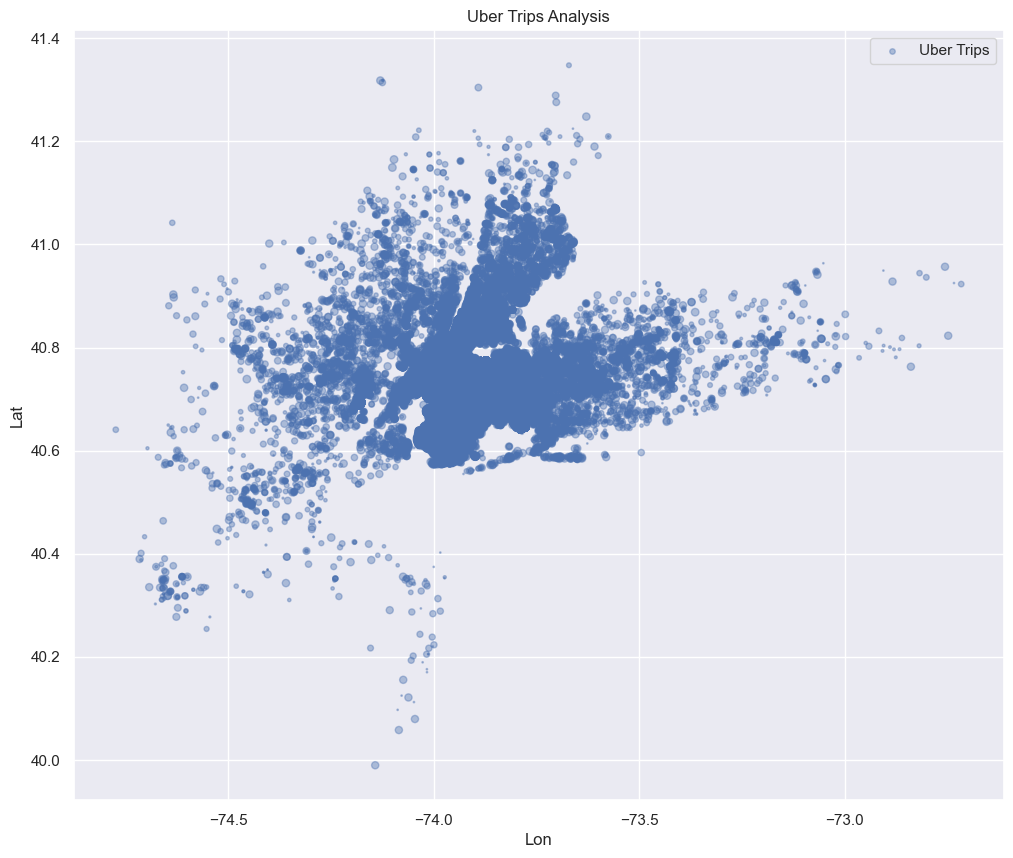

In [16]:
data.plot(kind = 'scatter', x = 'Lon', y = 'Lat', alpha = 0.4, s=data['Day'], label = 'Uber Trips',
         figsize=(12,10), cmap = plt.get_cmap('jet'))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()